# Import Libraries

In [1]:
import random
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

2023-06-21 07:19:20.083214: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-21 07:19:20.128150: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-21 07:19:20.129065: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-21 07:19:20.891536: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tf.__version__

'2.12.0'

# Train CNN using Fashion MNIST dataset

## Load Fashion MNIST Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
np.set_printoptions(linewidth=320)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

Label -  9


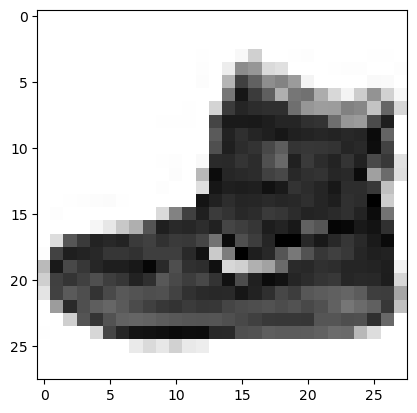

In [6]:
print('Label - ', y_train[0])
plt.imshow(x_train[0], cmap='Greys')

## Normalize Data

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## Base model using Dense Neural Network

In [8]:
model_naive = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])

In [10]:
model_naive.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [12]:
model_naive.fit(x_train, y_train, epochs=5)

2023-06-21 07:19:51.268050: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5020 - accuracy: 0.8230
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3765 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3355 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3136 - accuracy: 0.8846
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2941 - accuracy: 0.8929


In [13]:
model_naive.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (32, 784)                 0         
                                                                 
 dense (Dense)               (32, 128)                 100480    
                                                                 
 dense_1 (Dense)             (32, 10)                  1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Evaluate Model

In [14]:
model_naive.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3611 - accuracy: 0.8717


[0.3611087203025818, 0.8716999888420105]

## Build model using CNN

In [34]:
model_cnn = keras.models.Sequential([

    # Convolution & Max Pooling
    keras.layers.Conv2D(64, (3, 3), activation=keras.activations.relu, input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation=keras.activations.relu),
    keras.layers.MaxPool2D(2, 2),

    # Dense Layer
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])

### Model Summary

In [35]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

### Compile & Fit Model

In [36]:
model_cnn.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [37]:
history = model_cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5


2023-06-21 08:07:49.941538: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 65s 34ms/step - loss: 0.4389 - accuracy: 0.8404
Epoch 2/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2933 - accuracy: 0.8926
Epoch 3/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2470 - accuracy: 0.9082
Epoch 4/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2158 - accuracy: 0.9195
Epoch 5/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1889 - accuracy: 0.9293


### Evaluate Model

In [19]:
model_cnn.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2538 - accuracy: 0.9119


[0.2538110315799713, 0.911899983882904]

### History of Model

In [38]:
print('No. of Epochs Model trained for - ', history.epoch)

No. of Epochs Model trained for -  [0, 1, 2, 3, 4]


In [40]:
history.model.metrics_names

['loss', 'accuracy']

### Viz each CNN Layer

In [20]:
model_cnn.layers

In [25]:
def viz_cnn_layer(model, n_layers, images, img_idx):

    # Setup Viz grid
    fig, axarr = plt.subplots(1, n_layers)
    
    FIRST_IMAGE = 0
    SECOND_IMAGE = 23
    THIRD_IMAGE = 28
    CONV_NUMBER = 35

    layer_outputs = [layer.output for layer in model.layers]
    activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

    for i in range(n_layers):

        f = activation_model.predict(images[img_idx].reshape(1, 28, 28, 1))[i]
        axarr[i].imshow(f[0, :, :, CONV_NUMBER], cmap='inferno')
        axarr[i].grid(False)

1/1 [==============================] - 0s 25ms/step


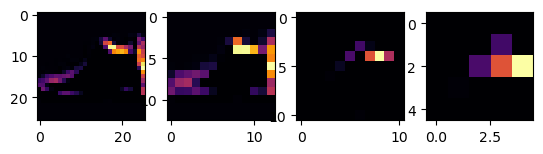

In [26]:
viz_cnn_layer(model_cnn, 4, x_test, 0)

1/1 [==============================] - 0s 28ms/step


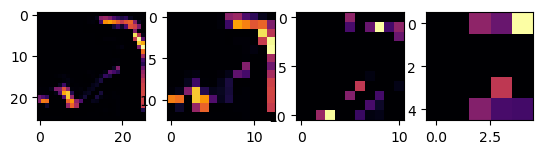

In [27]:
viz_cnn_layer(model_cnn, 4, x_test, 1200)

# Rough Work

In [28]:
x_test.shape

(10000, 28, 28)

In [30]:
(training_images, _), _ = tf.keras.datasets.mnist.load_data()

In [31]:
training_images.shape

(60000, 28, 28)

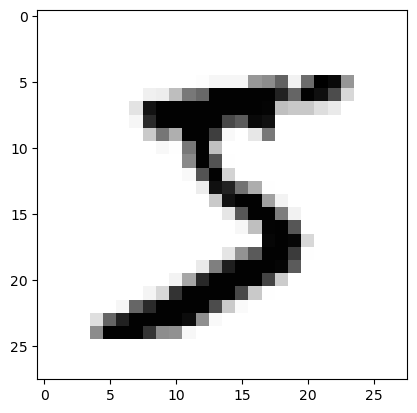

In [33]:
plt.imshow(training_images[0], cmap='Greys')